## Google Play Store apps and reviews

In [1]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps.index) )

# Have a look at a random sample of 5 rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4680,5661,AU Spark,FAMILY,3.7,681,8.2M,"10,000+",Free,0,Everyone,Education,"August 1, 2018",5.06,4.4 and up
3399,4285,KIM KARDASHIAN: HOLLYWOOD,GAME,4.3,1017408,34M,"10,000,000+",Free,0,Teen,Adventure,"July 16, 2018",9.2.0,4.0 and up
9130,10301,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104,2.3M,"1,000+",Free,0,Everyone,Finance,"August 7, 2018",2.1.0,4.1 and up
4159,5110,Wind & Weather Meter for Ag,WEATHER,NaN,3,14M,"1,000+",Free,0,Everyone,Weather,"March 14, 2016",v1.0,4.3 and up
6285,7331,"OurHome – chores, rewards, groceries and calendar",FAMILY,4.3,3146,NaN,"100,000+",Free,0,Everyone,Lifestyle;Education,"January 31, 2018",3.13.2,4.1 and up


### Data Cleaning

In [2]:
# List of characters to remove
chars_to_remove = ['+',',','M','$']
# List of column names to clean
cols_to_clean = ['Installs','Price', 'Size']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 

### Plotting App Categories

In [3]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


### Distribution of App Ratings

In [71]:
# Average rating of apps
avg_app_rating = apps.Rating.mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


### Size vs Price of an App

In [73]:
apps.sample(n)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6917,7979,CV-Library Job Search,BUSINESS,4.4,6997,4.6,100000,Free,0.0,Everyone,Business,"July 6, 2018",6.8.0,4.1 and up
337,373,Seznam.cz,COMMUNICATION,4.3,46702,NaN,1000000,Free,0.0,Everyone,Communication,"July 4, 2018",Varies with device,Varies with device
400,460,Mail1Click - Secure Mail,COMMUNICATION,4.1,255,1.6,10000,Free,0.0,Everyone,Communication,"April 11, 2017",2.3,2.2 and up
6387,7434,Pekalongan CJ,SOCIAL,NaN,0,5.9,0,Free,0.0,Teen,Social,"July 21, 2018",0.0.1,4.4 and up
716,880,Girly Lock Screen Wallpaper with Quotes,ENTERTAINMENT,4.2,32458,18.0,5000000,Free,0.0,Everyone,Entertainment,"June 19, 2018",2.2,4.1 and up


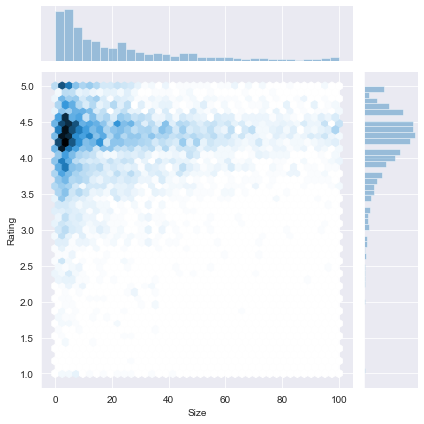

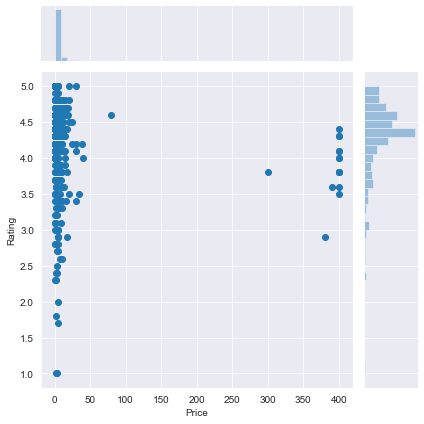

In [74]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby(['Category']).filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

### Catego

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


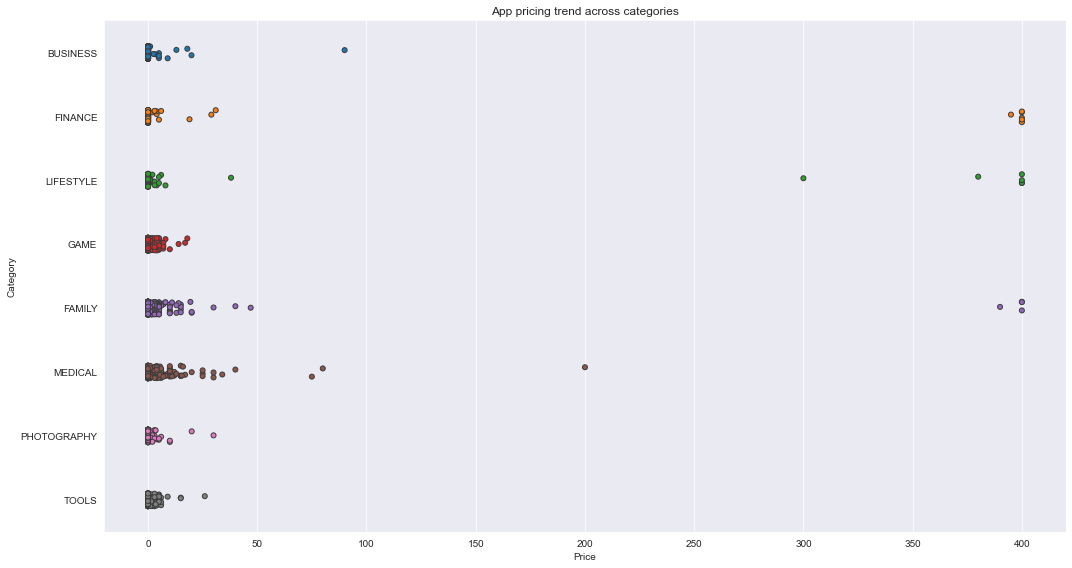

In [76]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

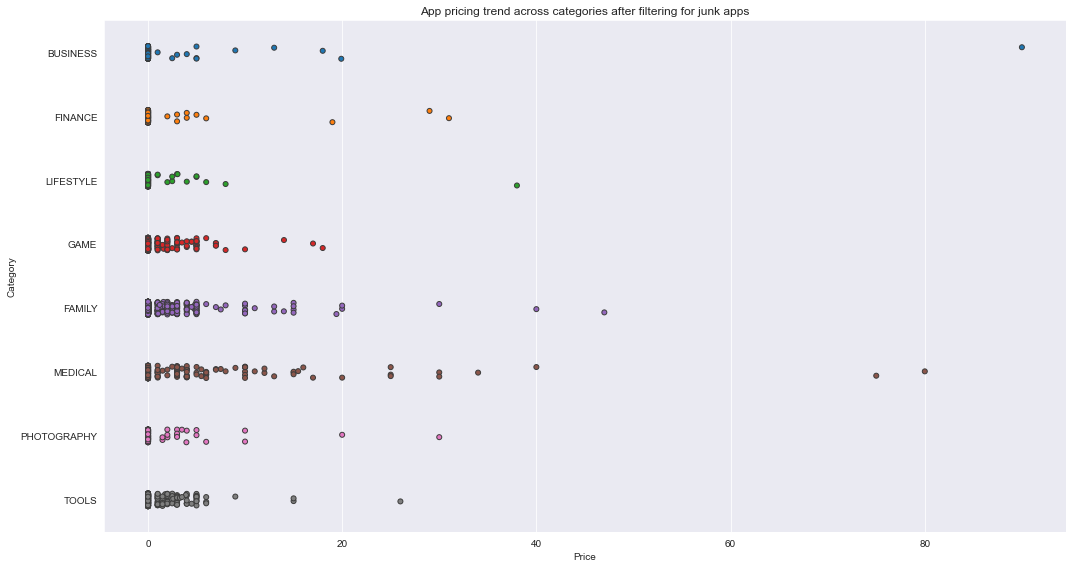

In [78]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 200]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [80]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

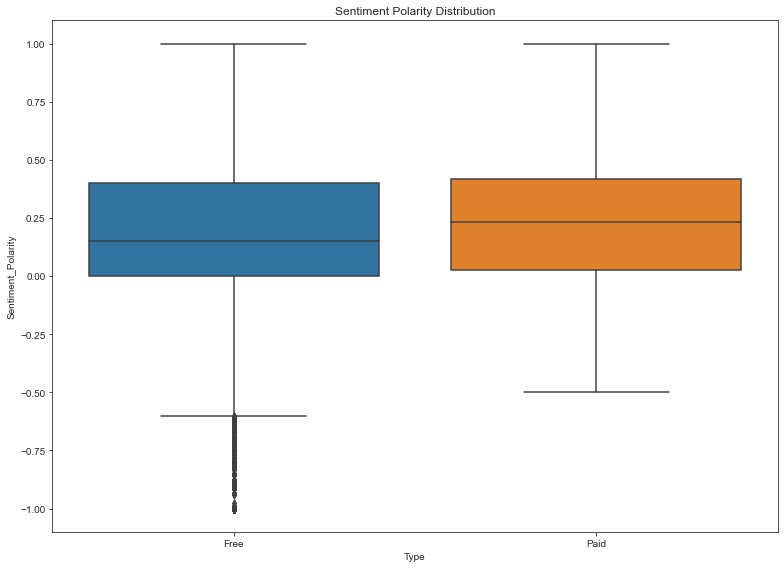

In [82]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')